# DACON 고객 대출등급 분류 해커톤

---

# import 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data set

`-` read data

In [13]:
df = pd.read_csv('C:\\Users\\default.DESKTOP-2ISHQBS\\lab\\data\\dacon\\open\\train.csv')

`-` 결측치 확인

In [22]:
df.isnull().sum(axis=0)

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

- 결측치는 확인되지 않음

`-` summary

In [31]:
df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


`-` data 변수 파악

- 이산형 변수
    - ID, 대출기간, 주택소유상태, 대출목적, 대출등급
- 연속형 변수
    - 대출금액, 근로기간, 연간소득, 부채대비 소득비율, 총계좌수,최근 2년간 연체횟수, 총상환원금, 총상환이자, 총연체금액, 연체계좌수
    
**ID 변수는 유의한 지표가 아니므로 제외**

# 이산형변수 data EDA

- 이산형변수

In [243]:
discrete = ['대출기간','주택소유상태','대출목적','대출등급']

df_discrete =df.loc[:,discrete]

`-` 변수 종류 파악

In [244]:
set_discrete = [set(df_discrete.iloc[:,i]) for i in range(len(discrete))]
set_discrete = [list(set_discrete[i]) for i in range(len(discrete))]
set_discrete

[[' 60 months', ' 36 months'],
 ['OWN', 'MORTGAGE', 'RENT', 'ANY'],
 ['자동차',
  '재생 에너지',
  '주택',
  '부채 통합',
  '소규모 사업',
  '휴가',
  '기타',
  '주요 구매',
  '이사',
  '신용 카드',
  '주택 개선',
  '의료'],
 ['C', 'E', 'F', 'B', 'G', 'D', 'A']]

## `-` 각 변수 bar 그래프

In [245]:
lst = []
for j in range(len(df_discrete.columns)):
    a= [df_discrete.iloc[:,j] == set_discrete[j][i] for i in range(len(set_discrete[j]))]
    lst.append(a)

In [246]:
lst2 =[]
for j in range(len(df_discrete.columns)):
    b=[(lst[j][i]*1).sum() for i in range(len(lst[j]))]
    lst2.append(b)
    

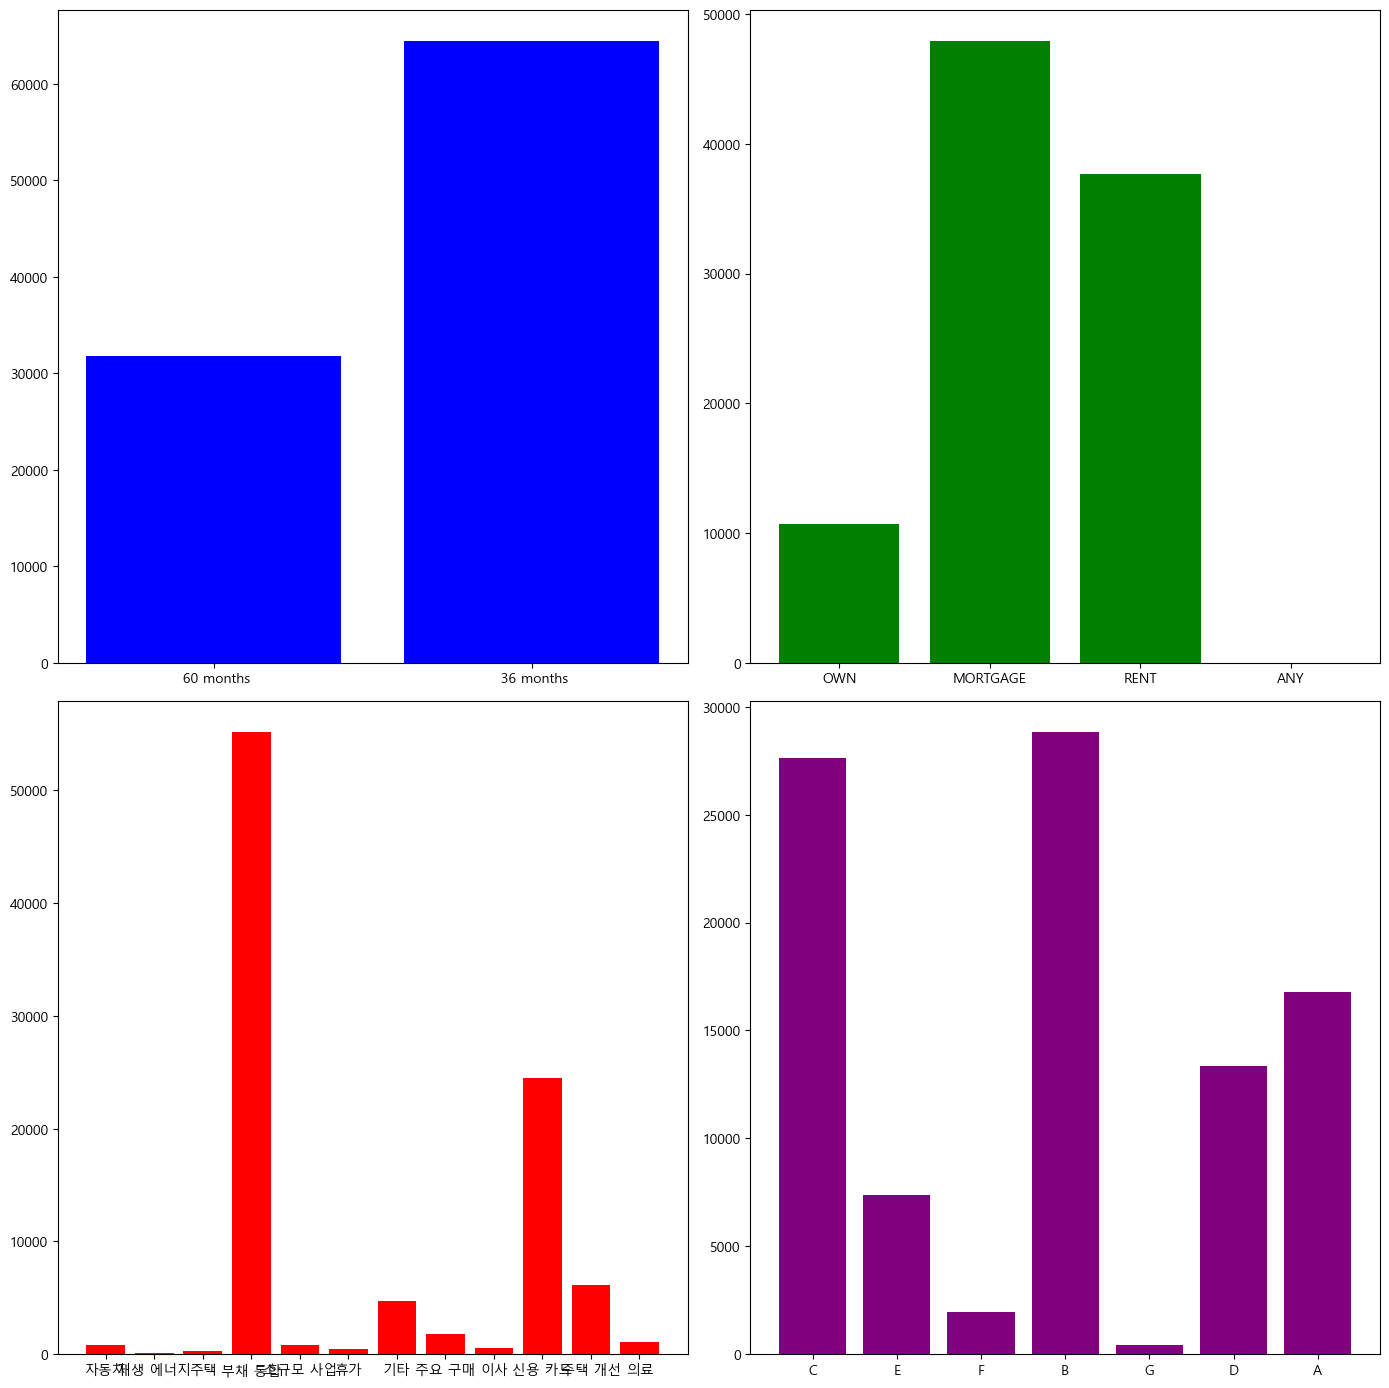

In [321]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# 각각의 축에 막대 그래프 추가
axes[0, 0].bar(set_discrete[0], lst2[0], color='blue')
axes[0, 1].bar(set_discrete[1],lst2[1], color='green')
axes[1, 0].bar(set_discrete[2],lst2[2], color='red')
axes[1, 1].bar(set_discrete[3],lst2[3], color='purple')

# 레이아웃 조정
plt.tight_layout()
plt.show()

## `-` 원그래프, count

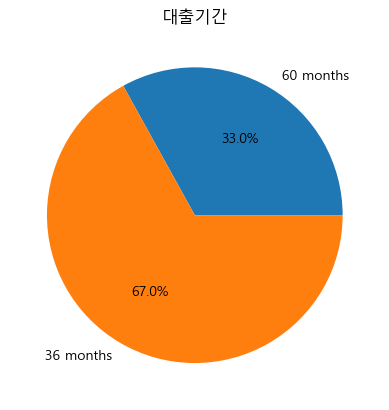

In [303]:
plt.pie(lst2[0],labels=set_discrete[0],autopct='%.1f%%');
plt.title('대출기간')
plt.show()

In [286]:
discreie_count= [pd.DataFrame({discrete[i]:lst2[i]},set_discrete[i]) for i in range(len(discrete))]
discreie_count[0]

,대출기간
60 months,31815
36 months,64479


`-` 대출기간
- 대출기간은 60개월과 36개월로 이루어져 있음
- 60개월보다 36개월 대출기간 고객이 2배가량 많다

---

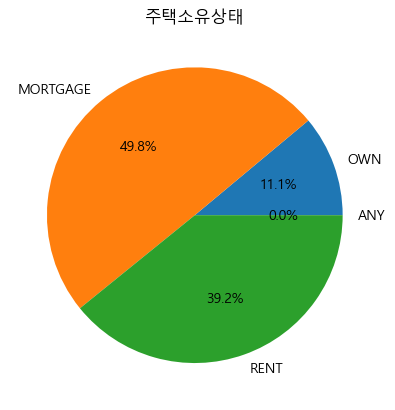

In [307]:
plt.pie(lst2[1],labels=set_discrete[1],autopct='%.1f%%');
plt.title('주택소유상태')
plt.show()

In [275]:
discreie_count[1]

,주택소유상태
OWN,10654
MORTGAGE,47934
RENT,37705
ANY,1


`-` 주택소유상태
- MORTGAGE(저당)으로 인한 주택소유가 가장 많으면 약 50%의 pie를 차지함
- RENT(전세)로 인한 주택소유는 약 40%로 2순위를 차지함
- OWN(자가보유)는 약 11%이다

---

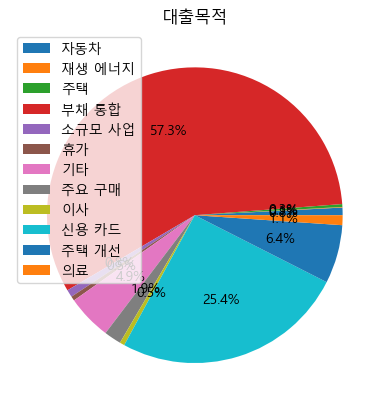

In [311]:
plt.pie(lst2[2],autopct='%.1f%%');
plt.title('대출목적')
plt.legend(set_discrete[2])
plt.show()

In [292]:
discreie_count[2].sort_values('대출목적',ascending=False)

,대출목적
부채 통합,55150
신용 카드,24500
주택 개선,6160
기타,4725
주요 구매,1803
의료,1039
자동차,797
소규모 사업,787
이사,506
휴가,466


`-` 대출목적
- 부채통합이 압도적으로 많은 경우를 차지함
- 신용 카드를 이용한 대출 거래가 그 뒤를 차지한다
- 나머지 목적의 총 pie가 대략 18%를 차지함

---

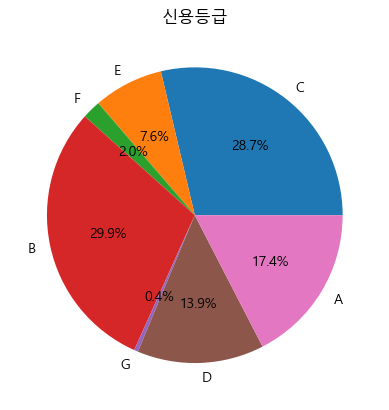

In [316]:
plt.pie(lst2[3],labels=set_discrete[3],autopct='%.1f%%');
plt.title('신용등급')
plt.show()

In [318]:
discreie_count[3].sort_values('대출등급',ascending=False)

,대출등급
B,28817
C,27623
A,16772
D,13354
E,7354
F,1954
G,420


`-` 대출등급
- B등급과 C등급이 근소한 차이로 1,2순위를 차지함
- A,C,B 등급이 전체의 2/3를 넘게 차지한다

---